<a href="https://colab.research.google.com/github/luisdiaz1997/EM_expression/blob/main/EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 n = 6
 O = np.ones(n)[:, None]

In [ ]:
O

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
C = np.array([123, 64, 2])[None,:]
C

array([[123,  64,   2]])

In [ ]:
A = np.array([[0, 0, 1],
              [0, 1, 0],
              [1, 0, 0],
              [1, 1, 0],
              [0, 1, 1], 
              [1, 0, 1]])
A

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 0],
       [0, 1, 1],
       [1, 0, 1]])

In [ ]:
np.dot(O, C)

array([[3.01842095e-03, 1.57056049e-03, 4.90800154e-05],
       [1.24510301e-77, 6.47858475e-78, 2.02455774e-79],
       [7.86832784e-76, 4.09408928e-76, 1.27940290e-77],
       [1.51649208e-46, 7.89069048e-47, 2.46584078e-48],
       [5.09785668e+04, 2.65254331e+04, 8.28919785e+02],
       [9.79744302e+04, 5.09785653e+04, 1.59308017e+03]])

In [ ]:
def expected(O, C, A):
  return np.dot(O, C) * A/np.dot(O.T, A)

In [ ]:
N = expected(O, C, A)

In [ ]:
N

array([[0.00000000e+00, 0.00000000e+00, 4.05285016e-08],
       [0.00000000e+00, 1.56313913e-80, 0.00000000e+00],
       [9.87813169e-79, 0.00000000e+00, 0.00000000e+00],
       [1.90384905e-49, 1.90384899e-49, 0.00000000e+00],
       [0.00000000e+00, 6.40000000e+01, 6.84491978e-01],
       [1.23000000e+02, 0.00000000e+00, 1.31550798e+00]])

In [ ]:
N.sum(axis=1, keepdims=True)

array([[4.05285016e-08],
       [1.56313913e-80],
       [9.87813169e-79],
       [3.80769804e-49],
       [6.46844920e+01],
       [1.24315508e+02]])

In [ ]:
def maxim(expected_m):
  return np.sum(expected_m, axis=1, keepdims=True)

In [ ]:
maxim(expected(O, C, A))

array([[4.05285016e-08],
       [1.56313913e-80],
       [9.87813169e-79],
       [3.80769804e-49],
       [6.46844920e+01],
       [1.24315508e+02]])

In [ ]:
def em_step(O, C, A):
  expected_m = expected(O, C, A)
  O = maxim(expected_m)
  return O

In [ ]:
def log_prob(O, C, A):
  return np.dot(C, np.dot(A.T, O)) - sum(np.dot(A.T, O))

In [ ]:
n=6
O = np.ones(n)[:,None]
scores = []
scores.append(log_prob(O, C, A)[0])
iterations = 10
for i in range(iterations):
  O = em_step(O, C, A)
  scores.append(log_prob(O, C, A)[0])

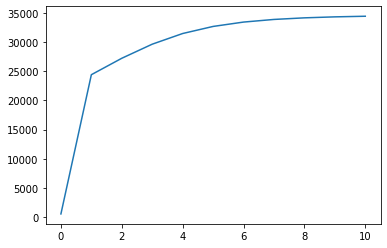

In [ ]:
plt.plot(np.arange(0, iterations+1), scores)

In [ ]:
np.round(O,0)

array([[  0.],
       [  0.],
       [  2.],
       [180.],
       [  0.],
       [  7.]])

In [ ]:
np.round(expected(O, C, A))

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  1.,   0.,   0.],
       [118.,  64.,   0.],
       [  0.,   0.,   0.],
       [  4.,   0.,   2.]])